# Time studies for Tweets

This study is focused on the daily and hourly trends in the volume of Black Friday and Cyber Monday tweets between Nov 8 and Dec 1, 2017.

Highest hourly volume of tweets:

1. Around 10 AM Eastern time on Black Friday (actually the whole 6am-12pm span)
2. A sharp spike right before 6 AM Eastern time on Small Business Saturday (protest against the repeal of net neutrality)
3. Around 11 AM Eastern time on Cyber Monday 

The tweet volume reported is representing a small fraction of the actual tweet volume about Black Friday and Cyber Monday. Twitter streaming is limited to a small fraction of the total volume of tweets at any given moment when a popular topic is being tracked.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pendulum # datetime + timezone

In [2]:
# read a few columns of the tweet data
tweets = pd.read_csv('df_tweets.csv', parse_dates=['created_at'], infer_datetime_format= True, low_memory=False,\
                    usecols=['id', 'created_at', 'hashtags'])

In [3]:
# datetime of the tweet object is in UTC (Universal Time Coordinate)
# so I generate a column for the time of the tweet in Pacific timezone
tweets['time_eastern'] = tweets['created_at'].apply(lambda x: x.tz_localize('UTC').tz_convert('US/Eastern'))

In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672773 entries, 0 to 1672772
Data columns (total 4 columns):
id              1672773 non-null int64
created_at      1672773 non-null datetime64[ns]
hashtags        1672773 non-null object
time_eastern    1672773 non-null datetime64[ns, US/Eastern]
dtypes: datetime64[ns, US/Eastern](1), datetime64[ns](1), int64(1), object(1)
memory usage: 51.0+ MB


In [5]:
# beginning & end of the data collection in Pacific time
print('First tweet recorded  @ {}'.format(tweets['time_eastern'].min()))
print('Last tweet recorded @ {}'.format(tweets['time_eastern'].max()))

First tweet recorded  @ 2017-11-08 05:57:45-05:00
Last tweet recorded @ 2017-12-01 03:43:30-05:00


In [6]:
tweets.head()

,id,created_at,hashtags,time_eastern
0,932568009427816449,2017-11-20 11:15:14,"['descuento', 'BlackFriday', 'ccrosaleda']",2017-11-20 06:15:14-05:00
1,932568012443602945,2017-11-20 11:15:15,['BlackFriday2017'],2017-11-20 06:15:15-05:00
2,932568026246975488,2017-11-20 11:15:18,"['AMAZON', 'DEALS', 'Christmas', 'holiday', 't...",2017-11-20 06:15:18-05:00
3,932568026494283776,2017-11-20 11:15:18,"['BlackFriday', 'CORSETS', 'dress', 'fashion']",2017-11-20 06:15:18-05:00
4,932568027010404354,2017-11-20 11:15:18,"['ghd', 'Christmas', 'hair', 'BlackFriday', 'B...",2017-11-20 06:15:18-05:00


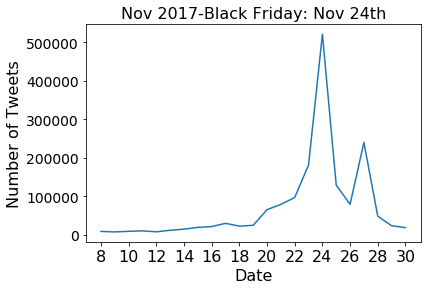

In [7]:
# volume of tweets per day
_ = plt.plot(tweets[tweets['time_eastern'].dt.month == 11].groupby(tweets['time_eastern'].dt.day)['id'].count())
_ = plt.title('Nov 2017-Black Friday: Nov 24th', fontsize=16)
_ = plt.xlabel('Date', fontsize=16)
_ = plt.ylabel('Number of Tweets per Day', fontsize=16)
_ = plt.xticks(range(8,31,2), fontsize=16)
_ = plt.yticks(fontsize=14)
plt.show()

In [8]:
# focusing on two weeks around Black Friday
start = pendulum.datetime(2017, 11, 17, 0, 0, 0, tzinfo='US/Eastern')
end = pendulum.datetime(2017, 11, 30, 23, 59, 59, tzinfo='US/Eastern')
print('Time Frame: {} to {}'.format(start, end))
# smaller dataframe with a two week span
two_weeks = tweets[(tweets['time_eastern'] >= start) & (tweets['time_eastern'] <= end)]

Time Frame: 2017-11-17T00:00:00-05:00 to 2017-11-30T23:59:59-05:00


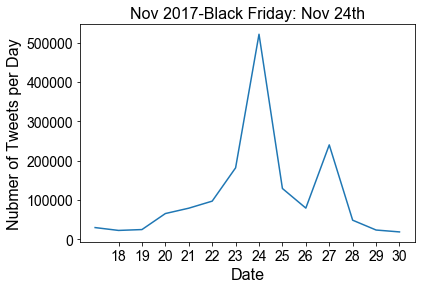

In [9]:
# groupby by day
ax = two_weeks.groupby(two_weeks['time_eastern'].dt.day)['id'].count().plot() #subplot object
sns.set_style("whitegrid")
_ = plt.title('Nov 2017-Black Friday: Nov 24th', fontsize=16)
_ = plt.xlabel('Date', fontsize=16)
_ = plt.ylabel('Nubmer of Tweets per Day', fontsize=16)
labels = ['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thanksgiving',\
         'Black Friday', 'Sat', 'Sun', 'Cyber Monday', 'Tue', 'Wed', 'Thu']
_ = plt.xticks(range(18, 31) , fontsize=14)
_ = plt.yticks(fontsize=14)
plt.show()

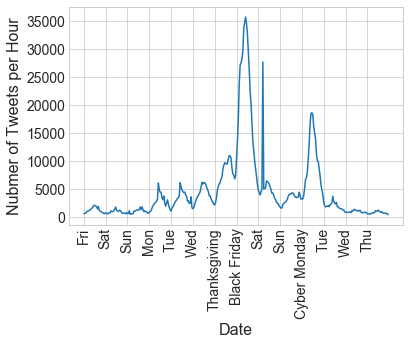

In [10]:
# groupby by day and hour
ax = two_weeks.groupby([two_weeks['time_eastern'].dt.day, two_weeks['time_eastern'].dt.hour])['id'].count().plot() #subplot object
_ = plt.title('Nov 2017-Black Friday: Nov 24th', fontsize=16)
_ = plt.xlabel('', fontsize=16)
_ = plt.ylabel('Nubmer of Tweets per Hour', fontsize=16)
labels = ['Fri','Sat', 'Sun', 'Mon', 'Tue', 'Wed','Thanksgiving',\
         'Black Friday', 'Sat', 'Sun', 'Cyber Monday','Tue', 'Wed', 'Thu']
_ = plt.xticks(np.arange(14), labels, rotation=90 , fontsize=14)
_ = plt.yticks(fontsize=14)
_ = ax.xaxis.set_ticks(np.arange(0, 336, 24)) # 14 days x 24 hrs = 336 hrs
plt.show()

In [11]:
# focusing on the Black Friday Weekend
s = pendulum.datetime(2017, 11, 23, 0, 0, 0, tzinfo='US/Eastern') # Thanksgiving day
e = pendulum.datetime(2017, 11, 25, 23, 59, 59, tzinfo='US/Eastern') # Small Businees Saturday
Th_BF_Sa = tweets[(tweets['time_eastern'] >= s) & (tweets['time_eastern'] <= e)]

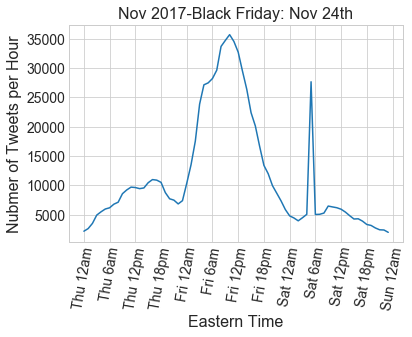

In [12]:
# groupby by day and hour
ax = Th_BF_Sa.groupby([Th_BF_Sa['time_eastern'].dt.day, Th_BF_Sa['time_eastern'].dt.hour])['id'].count().plot() #subplot object
_ = plt.title('Nov 2017-Black Friday: Nov 24th', fontsize=16)
labels = ['Thu 12am', 'Thu 6am','Thu 12pm', 'Thu 18pm','Fri 12am', 'Fri 6am','Fri 12pm', 'Fri 18pm',\
         'Sat 12am', 'Sat 6am','Sat 12pm', 'Sat 18pm', 'Sun 12am']
_ = plt.xlabel('Eastern Time', fontsize=16)
_ = plt.ylabel('Nubmer of Tweets per Hour', fontsize=16)
_ = plt.xticks(np.arange(13), labels, rotation=80 , fontsize=14)
_ = plt.yticks(fontsize=14)
_ = ax.xaxis.set_ticks(np.arange(0, 78, 6)) # 3 days x 24 hrs = 72 hrs
plt.show()

In [13]:
# Cyber Monday
CM_s = pendulum.datetime(2017, 11, 27, 0, 0, 0, tzinfo='US/Eastern') 
CM_e = pendulum.datetime(2017, 11, 27, 23, 59, 59, tzinfo='US/Eastern') 
CM = tweets[(tweets['time_eastern'] >= CM_s) & (tweets['time_eastern'] <= CM_e)]

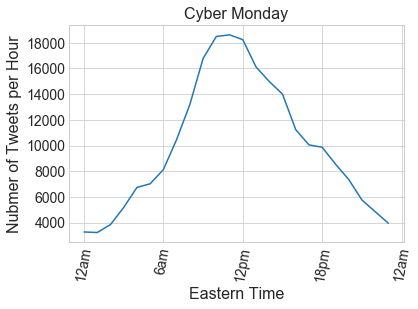

In [15]:
# groupby by day and hour
ax = CM.groupby([CM['time_eastern'].dt.day, CM['time_eastern'].dt.hour])['id'].count().plot() #subplot object
_ = plt.title('Cyber Monday', fontsize=16)
labels = ['12am', '6am', '12pm', '18pm', '12am']
_ = plt.xlabel('Eastern Time', fontsize=16)
_ = plt.ylabel('Nubmer of Tweets per Hour', fontsize=16)
_ = plt.xticks(np.arange(5), labels, rotation=80 , fontsize=14)
_ = plt.yticks(fontsize=14)
_ = ax.xaxis.set_ticks(np.arange(0, 30, 6)) # 1 days x 24 hrs = 24 hrs
plt.show()

In [17]:
# figure out what was the spike at 5-6 am on Small Business Saturday
# more than 90% of the collected tweets were created between 5:30 am to 6 am Eastern time
# So let's focus on those
sat_5am = pendulum.datetime(2017, 11, 25, 5, 30, 0, tzinfo='US/Eastern')
sat_6am = pendulum.datetime(2017, 11, 25, 6, 0, 0, tzinfo='US/Eastern')
sat_spike = tweets[(tweets['time_eastern'] >= sat_5am) & (tweets['time_eastern'] <= sat_6am)]

In [18]:
# figure out what was the spike at 5 am (related to 5-5:59 am tweets) on Small Business Saturday 
sat_spike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25135 entries, 109290 to 134431
Data columns (total 4 columns):
id              25135 non-null int64
created_at      25135 non-null datetime64[ns]
hashtags        25135 non-null object
time_eastern    25135 non-null datetime64[ns, US/Eastern]
dtypes: datetime64[ns, US/Eastern](1), datetime64[ns](1), int64(1), object(1)
memory usage: 981.8+ KB


In [19]:
# figure out what was the spike 5:30 - 6 am on Small Business Saturday, Nov 25th 2017
from collections import Counter
hashtag_list = ''.join(sat_spike['hashtags']).lower().replace('][', ', ').strip('[]').replace("'",'').split(', ')
hashtag_counter = Counter(hashtag_list)
hashtag_counter.most_common(5)

[('blackfriday', 24332),
 ('netneutrality', 22719),
 ('', 331),
 ('cybermonday', 197),
 ('blackfriday2017', 179)]

### Tweet Volume Spike on Small Business Saturday
- The recorded spike in the volume of tweets tracking black friday was because of #netneutrality. The FCC had a plan to repeal net neutrality on Dec 14, 2017 and they did so. The conversation about net neutrality on small business saturday, Nov 25th, were about the negative effects of the repeal on small businesses. 

- At first, the timing of the spike (5-6 am Eastern) seems odd and I suspected that I had collected an unusually high percentage of the tweets during that period. However, further investigations showed that the spike was part of an organized protest against repealing net neutrality. People posted the exact same tweet before 6 AM Eastern on Small Business Saturday.

P.S. Twitter streaming is limited to a small fraction of the total volume of tweets at any given moment when a popular topic is being tracked. That was definitely the case for tracking the blackfriday tweets. 


In [20]:
# Check the volume of net neutrality hashtag during the whole day
sat_s = pendulum.datetime(2017, 11, 25, 0, 0, 0, tzinfo='US/Eastern')
sat_e = pendulum.datetime(2017, 11, 25, 23, 59, 59, tzinfo='US/Eastern')
saturday = tweets[(tweets['time_eastern'] >= sat_s) & (tweets['time_eastern'] <= sat_e)]
hashtag_Sat = ''.join(saturday['hashtags']).lower().replace('][', ', ').strip('[]').replace("'",'').split(', ')
hashtag_Sat_counter = Counter(hashtag_Sat)
hashtag_Sat_counter.most_common(10)

[('blackfriday', 94308),
 ('netneutrality', 22852),
 ('', 17284),
 ('cybermonday', 14271),
 ('blackfriday2017', 6347),
 ('blackfridaydeals', 5246),
 ('giveaway', 4909),
 ('sale', 4737),
 ('deals', 4096),
 ('smallbusinesssaturday', 2668)]

- It turned out that almost all the tweets with #netneutrality were tweeted between 5:30 to 6 am (Eastern).

In [21]:
# have a closer look at these tweets
id_list = [x for x in sat_spike['id']]

tweets = pd.DataFrame()
spike_tweets = pd.read_csv('df_tweets.csv', low_memory=False, usecols=['id', 'full_text', 'user_name', 'hashtags'])

spike_tweets = spike_tweets[spike_tweets['id'].isin(id_list)]

In [22]:
g_hash = spike_tweets.groupby('hashtags')['id'].count().sort_values(ascending=False)[:5]
print(g_hash)

hashtags
['BlackFriday', 'NetNeutrality']    22699
['BlackFriday']                       339
[]                                    331
['SlotBlackFriday']                   119
['blackfriday']                        84
Name: id, dtype: int64


- Almost all of them have the exact two hashtags: BlackFriday & NetNeutrality

### The protest tweet that caused a tweet volume spike on Small Business Saturday right before 6 am

visit http://verizonprotests.com/

In [23]:
# Full_text column was checked carefully
# 22699 tweets were the exact same tweet, available at verizonprotests.com to be posted by one click
print(spike_tweets.iloc[5000, 2])

["The FCC is hoping #BlackFriday will bury the backlash to their plan to kill #NetNeutrality. We can't let that happen. Protests everywhere December 7! https://t.co/JgINDl7HA6 https://t.co/Pl6x5uZGDv"]


<img src="verizonprotest.jpg" alt="Verizonprotests" style="width: 500px;"/>